In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import csv
import json
import seaborn as sns
#import psycopg2
from prettytable import PrettyTable
import random
import numpy as np
from io import StringIO
import re


In [24]:
df = pd.read_csv("./data/sivigila_vih.csv", sep=",")

C:\Users\valen\AppData\Local\Temp\ipykernel_26752\619454298.py:1: DtypeWarning: Columns (40,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/sivigila_vih.csv", sep=",")


In [26]:
Datos = df.copy()

In [30]:
Datos.shape

(15470, 116)

In [27]:
Datos.head(20)

,cod_eve,fec_not,semana,año,cod_pre,cod_sub,edad_,uni_med_,nacionali_,nombre_nacionalidad,...,clasificación_final,codigo_barrio,codigo_comuna,nombre_barrio,nombre_comuna,grupo_edad_quinque,grupo_edad_ciclo,periodo_epid,mes_caso,ID
0,850,29/01/2022,4,2022,500105568,13,27,1,170.0,COLOMBIA,...,3,0304,3,Santa Inés,03 Manrique,25-29,18-28,1,1,0xAF726EDB4B21FF3D2FACB4E62EB6C302DAF4A56E8685...
1,850,25/02/2021,8,2021,500102175,1,26,1,170.0,COLOMBIA,...,3,9999,99,Sin Información,Sin Información,25-29,18-28,2,2,0xAF72E09C1FF26C865EA1E183B32ED240C9CDF1002C14...
2,850,11/02/2023,6,2023,500102178,57,33,1,170.0,COLOMBIA,...,3,0207,2,Villa del Socorro,02 Santa Cruz,30-34,29-59,2,2,0xAF73235848357C53380ED8EF0CDAE1A1DEA7A72833A7...
3,850,9/07/2020,28,2020,500116163,1,59,1,170.0,COLOMBIA,...,3,9999,99,Sin Información,Sin Información,55-59,29-59,7,7,0xAF733665CB87B3B1FE02F156C339F58613E06AA81A22...
4,850,2/09/2014,36,2014,500102144,1,55,1,NaN,NaN,...,3,0905,9,Alejandro Echavarría,09 Buenos Aires,55-59,29-59,9,9,0xAF748987E0EC472FDF92CAB895AD0401E3FB7C92EF5D...
5,850,20/03/2014,12,2014,500102175,1,23,1,NaN,NaN,...,3,0718,7,Cucaracho,07 Robledo,20-24,18-28,3,3,0xAF74C0B97E62BE0BC53511ABD71E3F5F6892B00E420A...
6,850,11/11/2016,44,2016,500105568,13,29,1,NaN,NaN,...,3,0305,3,El Raizal,03 Manrique,25-29,29-59,11,11,0xAF768A906F24512B4C03CB62B0CFDDD444AE5A8467B2...
7,850,24/01/2023,4,2023,500110471,9,29,1,170.0,COLOMBIA,...,3,9999,99,Sin Información,Sin Información,25-29,29-59,1,1,0xAF892B6817EF91FD5B51034A7C165F1C9AB69581BCC7...
8,850,13/11/2019,46,2019,500104347,1,28,1,170.0,COLOMBIA,...,3,1611,16,Loma de los Bernal,16 Belén,25-29,18-28,12,11,0xAF8CB8C328F36A22837F6A0933B3578572D5BD66A371...
9,850,2/03/2018,9,2018,500112321,7,23,1,NaN,NaN,...,3,0405,4,Moravia,04 Aranjuez,20-24,18-28,3,3,0xAF8D356473988263E691CD8B5D38B998EB34CEE54459...


In [28]:
total_duplicates = Datos.duplicated().sum()

summary_table = PrettyTable()
summary_table.field_names = ["Column Name", "Type of Data", "Missing Values", "Unique Entries", "Count of Duplicates"]

for column in Datos.columns:
    data_type = Datos[column].dtype
    null_count = Datos[column].isnull().sum()
    unique_count = Datos[column].nunique()
    summary_table.add_row([column, data_type, null_count, unique_count, total_duplicates])

print(summary_table)

+---------------------+--------------+----------------+----------------+---------------------+
|     Column Name     | Type of Data | Missing Values | Unique Entries | Count of Duplicates |
+---------------------+--------------+----------------+----------------+---------------------+
|       cod_eve       |    int64     |       0        |       1        |          3          |
|       fec_not       |    object    |       0        |      3466      |          3          |
|        semana       |    int64     |       0        |       53       |          3          |
|         año         |    int64     |       0        |       12       |          3          |
|       cod_pre       |    int64     |       0        |      246       |          3          |
|       cod_sub       |    int64     |       0        |       73       |          3          |
|        edad_        |    int64     |       0        |       85       |          3          |
|       uni_med_      |    int64     |       0    

Me llama la atención el hecho de hay demasiados datos nulos en las columnas sem_emb, embarazo, hij_18m, val_res, dono_sangr, ide_genero, fm_grado, fm_unidad, fm_fuerza, cbmte_, cer_def_, fuente, nom_grupo, estrato, gp_discapa, gp_desplaz, gp_migrant, gp_carcela, gp_gestan, sem_ges, gp_indigen, gp_pobicbf, gp_mad_com, gp_desmovi, gp_psiquia, gp_vic_vio.

Revisemos más a detalle la cantidad de valores nulos que contienen.

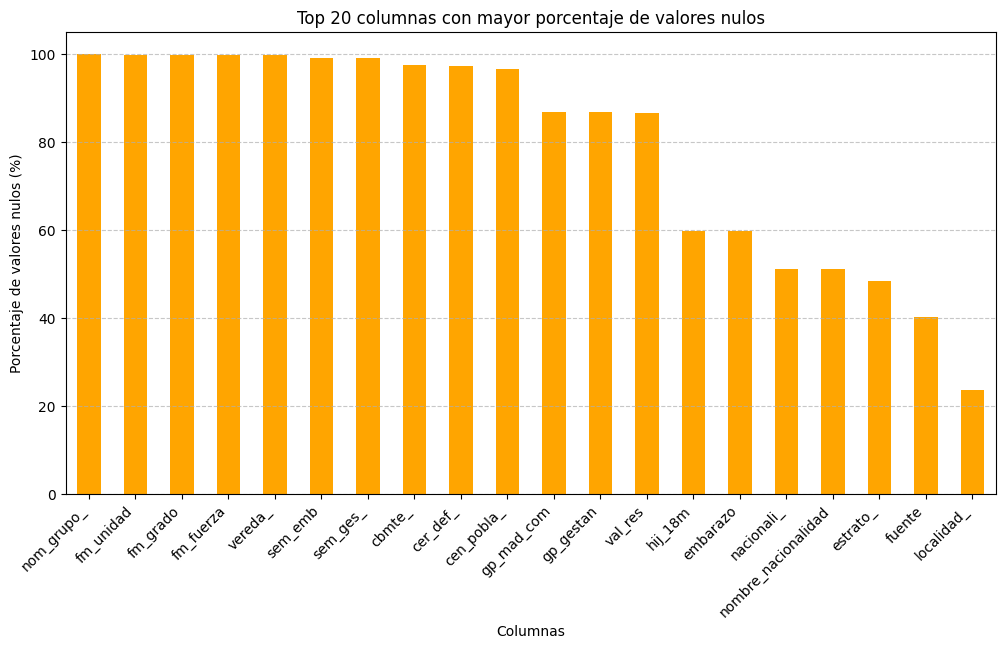

In [29]:
# Calcular porcentaje de valores nulos
null_percent = Datos.isnull().mean() * 100

# Filtrar columnas con nulos
null_percent_filtered = null_percent[null_percent > 0]

# Seleccionar las 20 columnas con más nulos (ajusta el número)
top_n = 20
null_percent_top = null_percent_filtered.sort_values(ascending=False).head(top_n)

# Gráfico de barras
plt.figure(figsize=(12, 6))
null_percent_top.plot(kind='bar', color='orange')
plt.title(f"Top {top_n} columnas con mayor porcentaje de valores nulos")
plt.xlabel("Columnas")
plt.ylabel("Porcentaje de valores nulos (%)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Hay columnas con demasiados valores nulos, llegando a un 100%. En ese caso serán removidas ya que no aportan información relevante al análisis, en ese sentido removeremos las columnas nom_grupo_, fm_unidad, fm_grado, fm_fuerza, vereda_, sem_emb_, sem_ges_, chmte_, cer_def_, cer_pobla_, gp_mad_com, gp_gestan, val_res, hij_18m y embarazo

In [31]:
Datos.drop(columns=['nom_grupo_', 'fm_unidad', 'fm_grado', 'fm_fuerza', 'vereda_', 'sem_emb_', 'sem_ges_', 'chmte_', 'cer_def_', 'cer_pobla_', 'gp_mad_com', 'gp_gestan', 'val_res', 'hij_18m', 'embarazo'], inplace=True, errors='ignore')

Datos.head(2)

,cod_eve,fec_not,semana,año,cod_pre,cod_sub,edad_,uni_med_,nacionali_,nombre_nacionalidad,...,clasificación_final,codigo_barrio,codigo_comuna,nombre_barrio,nombre_comuna,grupo_edad_quinque,grupo_edad_ciclo,periodo_epid,mes_caso,ID
0,850,29/01/2022,4,2022,500105568,13,27,1,170.0,COLOMBIA,...,3,0304,3,Santa Inés,03 Manrique,25-29,18-28,1,1,0xAF726EDB4B21FF3D2FACB4E62EB6C302DAF4A56E8685...
1,850,25/02/2021,8,2021,500102175,1,26,1,170.0,COLOMBIA,...,3,9999,99,Sin Información,Sin Información,25-29,18-28,2,2,0xAF72E09C1FF26C865EA1E183B32ED240C9CDF1002C14...


In [ ]:
#Me interesa ver los valores únicos de las siguientes columnas:
print("Valores únicos en 'nacionali_':", Datos['nacionali_'].dropna().unique())
print("Valores únicos en 'nombre_nacionalidad':", Datos['nombre_nacionalidad'].dropna().unique())
print("Valores únicos en 'cod_pais_r':", Datos['cod_pais_r'].dropna().unique())
print("Valores únicos en 'cod_dpto_r':", Datos['cod_dpto_r'].dropna().unique())
print("Valores únicos en 'cod_mun_r':", Datos['cod_mun_r'].dropna().unique())


Valores únicos en 'nacionali_': [170. 862.  76. 192. 630. 840. 484. 174. 604. 470. 616. 152.  70.  32.
 162. 380. 724.   4. 218. 591. 600. 826.]
Valores únicos en 'nombre_nacionalidad': ['COLOMBIA' 'VENEZUELA' 'BRASIL' 'CUBA' 'PUERTO RICO'
 'ESTADOS UNIDOS DE AMÉRICA' 'MÉXICO' 'COMORAS' 'PERÚ' 'MALTA' 'POLONIA'
 'CHILE' 'BOSNIA Y HERZEGOVINA\xa0' 'ARGENTINA' 'ISLA CHRISTMAS\xa0'
 'ITALIA' 'ESPAÑA' 'AFGANISTÁN' 'ECUADOR' 'PANAMÁ' 'PARAGUAY'
 'REINO UNIDO DE GRAN BRETAÑA E IRLANDA DEL']
Valores únicos en 'cod_pais_r': [170. 218.]
Valores únicos en 'cod_dpto_r': [5 1 11 27 9 17 23 19 52 91 54 76 41 68 73 70 15 '05' '5' '01' '70' '23'
 '54' '41' '63' '15' 'BA' '68' '50' '47' '13' '25' '19' '73' '11' '88' '8']
Valores únicos en 'cod_mun_r': [  1  88 170 111 212 360  42 368 861 266 380 847 615   0 376  79 837 604
 148 440 694 631   2 240 787 887 490 130 206 390 175 678 697 555 708 154
 664 572 118 736 129 543 101 501 686 789  11  34 147 466 308 579 223 189
 361 318 320  45  21 215 264 458  5

In [ ]:
Datos.describe()

,cod_eve,semana,año,cod_pre,cod_sub,edad_,uni_med_,nacionali_,cod_pais_o,cod_dpto_o,...,hep_b,hep_c,meningitis,sem_emb,embarazo,hij_18m,clasificación_final,codigo_comuna,periodo_epid,mes_caso
count,15470.0,15470.000000,15470.000000,1.547000e+04,15470.000000,15470.000000,15470.000000,7572.000000,15470.000000,15470.000000,...,15463.000000,15464.000000,15464.000000,146.000000,6241.000000,6227.000000,15470.0,15470.000000,15470.000000,15470.000000
mean,850.0,25.826115,2018.335359,5.202581e+08,11.394312,32.895023,1.000970,253.872293,172.253652,5.078474,...,1.993921,1.999030,1.995409,18.239726,1.976767,0.285049,3.0,30.881448,6.828054,6.382030
std,0.0,14.919241,3.061570,2.910069e+08,15.784599,11.889479,0.031125,225.572295,39.154509,2.089360,...,0.077733,0.031131,0.067606,10.329940,0.150656,2.720018,0.0,38.364305,3.731819,3.419873
min,850.0,1.000000,2012.000000,5.000000e+08,0.000000,1.000000,1.000000,4.000000,32.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.0,1.000000,1.000000,1.000000
25%,850.0,12.000000,2016.000000,5.001022e+08,1.000000,24.000000,1.000000,170.000000,170.000000,5.000000,...,2.000000,2.000000,2.000000,10.000000,2.000000,0.000000,3.0,6.000000,3.000000,3.000000
50%,850.0,26.000000,2019.000000,5.001056e+08,4.000000,30.000000,1.000000,170.000000,170.000000,5.000000,...,2.000000,2.000000,2.000000,16.000000,2.000000,0.000000,3.0,10.000000,7.000000,6.000000
75%,850.0,39.000000,2021.000000,5.001105e+08,13.000000,39.000000,1.000000,170.000000,170.000000,5.000000,...,2.000000,2.000000,2.000000,27.000000,2.000000,0.000000,3.0,60.000000,10.000000,9.000000
max,850.0,53.000000,2023.000000,8.800100e+09,99.000000,117.000000,2.000000,862.000000,862.000000,76.000000,...,2.000000,2.000000,2.000000,40.000000,2.000000,99.000000,3.0,99.000000,28.000000,12.000000
